## Data Processing

In [0]:
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample01-02-03.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample04-05-06.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample07-08-09.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample10-11-12.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample13-14-15.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample16-17-18.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample19-20-21.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample22-23-24.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample25-26-27.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample28-29-30.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample31-32-33.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample34-35-36.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample37-38-39.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample40-41-42.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample43-44-45.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample46-47-48.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample49-50-51.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample52-53-54.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample55-56-57.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample58-59-60.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample61.tar.gz

# !for file in *.tar.gz; do tar -C data -zxf "$file"; done

!for folder in {1..9};do for file in data/data/sample0"$folder"/*.Z; do uncompress "$file"; done; done
!for folder in {10..61};do for file in data/data/sample"$folder"/*.Z; do uncompress "$file"; done; done

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

In [90]:
root_folder = 'data/data/'
template_name = root_folder + 'samplexx/' + 'xx-xx-xx.bmp'
import glob
import os

filenames = []

for r, d, f in os.walk(root_folder):
    if r.__contains__("sample"):
        for file in f:
            if file.endswith(".bmp"):
                name = os.path.join(r, file)
                if len(name) == len(template_name) and not name[-10].__contains__('b'):
                    filenames.append(name)
print(len(filenames))
filenames = np.array(filenames)

12505


In [91]:
# random subsample with size of 92
sample_size = 92
n_classes = 61
samples_per_class = 205
samples = samples_per_class - sample_size

for i in range(n_classes):
    drop_idx = random.sample(range(i*samples_per_class, (i+1)*samples_per_class), samples)
    filenames[drop_idx] = ''
filenames = [name for name in filenames if name != '']
print(len(filenames))

5612


In [92]:
for i in range(9):
    print(len([s for s in filenames if s.__contains__('sample0'+str(i+1))]),', ', end='')
for i in range(10,62):
    print(len([s for s in filenames if s.__contains__('sample'+str(i))]), ', ', end='')

92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 

In [93]:
shape = (480, 640)
crop_size = 200
center = np.array(shape) // 2

x = np.empty((len(filenames), crop_size, crop_size))

for i, f in enumerate(filenames):
    # grayscale mode
    img = cv2.imread(f, 0)

    if img is None:
        continue

    # center crop to (200, 200)
    x[i] = img[center[0]-crop_size//2:center[0]+crop_size//2, center[1]-crop_size//2:center[1]+crop_size//2]
    
    if i % 1000 == 0:
        print('{} images processed...'.format(i))
    
# note that image indexed at 5436 is invalid and NoneType in non sampled filenames.

0 images processed...
1000 images processed...
2000 images processed...
3000 images processed...
4000 images processed...
5000 images processed...


(5612, 200, 200)


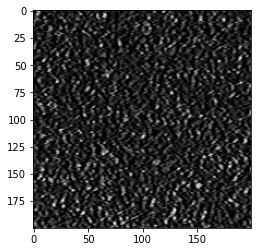

In [95]:
print(x.shape)
plt.imshow(x[1552], cmap='gray')

In [0]:
# normalization

mean = x.mean()
std = x.std()

x = (x - mean) / std

In [0]:
# generate labels
y = np.empty((len(x), ))
for i, f in enumerate(filenames):
    y[i] = int(f[16:18])

## Filter Bank